In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *

from vd_env.lambda_env import LambdaEnv

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=-1,
    down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT,
)

terms = terms[:LAMBDA_TERM_COUNT]
stepsLO = stepsLO[:LAMBDA_TERM_COUNT]

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f"number of terms with normal form {len(terms)}")

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [
    sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 213
LO strategy applying
Remove unormalized terms
Left -1 normalizeble terms
number of lambda terms 100
number of vertices= [54, 59, 59, 58, 55, 51, 53, 59, 55, 55, 52, 53, 51, 55, 53, 59, 57, 53, 57, 55, 54, 52, 59, 59, 54, 58, 51, 54, 56, 51, 56, 55, 52, 54, 54, 53, 58, 55, 51, 59, 52, 55, 57, 59, 56, 56, 58, 52, 51, 59, 53, 52, 51, 51, 51, 52, 53, 57, 59, 59, 55, 52, 58, 54, 53, 51, 53, 56, 57, 53, 54, 57, 55, 55, 52, 58, 53, 53, 52, 52, 56, 51, 55, 59, 57, 55, 54, 54, 57, 51, 59, 51, 54, 54, 52, 54, 53, 51, 54, 52]
number of redexes= [7, 4, 8, 9, 5, 5, 8, 5, 3, 5, 8, 6, 7, 7, 6, 8, 6, 2, 6, 2, 6, 5, 5, 5, 6, 7, 7, 7, 4, 6, 5, 4, 1, 6, 7, 6, 4, 7, 6, 11, 6, 6, 7, 8, 6, 4, 7, 5, 2, 5, 7, 8, 6, 6, 8, 0, 4, 5, 6, 8, 6, 9, 5, 8, 4, 6, 9, 4, 5, 8, 7, 7, 9, 4, 6, 7, 3, 2, 3, 7, 5, 5, 4, 5, 5, 4, 7, 8, 4, 6, 6, 6, 6, 8, 6, 3, 2, 8, 8, 4]
number of steps to normalize using LO strategy= [4, 6, 35, 9, 5, 20, 8, 26, 3, 19, 10, 9, 6, 7, 11, 11, 7, 7, 8, 8, 16, 4, 2, 1, 21, 5, 9

In [3]:
print("max cound LO: {}".format(max(stepsLO)))
print("max cound RI: {}".format(max(stepsRI)))
print("max cound Rand: {}".format(max(stepsRand)))

max cound LO: 38
max cound RI: inf
max cound Rand: inf


In [4]:
max_count_steps_rlenv = 100
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

In [5]:
lambda_env = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms,
    max_step_term=max_count_steps_rlenv,
    count_terms=LAMBDA_TERM_COUNT,
)

In [7]:
# run LO strategy only

LO_env_steps = []
while lambda_env.is_has_next_term():
    while True:
        state, _, done, _ = lambda_env.step(0)
        if done:
            break
    lambda_env.next_term()

for term_history in state.values():
    LO_env_steps.append(len(term_history) - 1)

print("LO steps env history:", LO_env_steps)

LO steps env history: [4, 6, 35, 9, 5, 20, 8, 26, 3, 19, 10, 9, 6, 7, 11, 11, 7, 7, 8, 8, 16, 4, 2, 1, 21, 5, 9, 5, 10, 4, 6, 19, 1, 2, 6, 12, 7, 9, 2, 38, 11, 11, 11, 11, 8, 1, 2, 1, 2, 2, 15, 8, 25, 5, 11, 0, 3, 1, 5, 3, 8, 2, 5, 1, 13, 5, 14, 7, 7, 5, 8, 1, 9, 5, 1, 3, 3, 2, 4, 7, 2, 30, 9, 1, 32, 4, 1, 15, 2, 8, 5, 6, 12, 23, 4, 3, 2, 11, 2, 2]


In [8]:
# run RI strategy only
lambda_env.reset_soft()

RI_env_steps = []
while lambda_env.is_has_next_term():
    while True:
        state, _, done, _ = lambda_env.step(1)
        if done:
            break
    lambda_env.next_term()

for term_history in state.values():
    RI_env_steps.append(len(term_history) - 1)

print("RI steps env history:", RI_env_steps)

RI steps env history: [10, 10, 22, 12, 9, 12, 12, 99, 3, 17, 17, 10, 7, 7, 17, 19, 7, 7, 8, 8, 18, 65, 99, 10, 17, 9, 18, 10, 10, 7, 7, 13, 1, 8, 9, 12, 11, 9, 10, 18, 11, 7, 14, 14, 8, 5, 9, 99, 2, 5, 15, 13, 22, 8, 10, 0, 5, 5, 13, 10, 26, 10, 5, 8, 7, 10, 15, 20, 8, 10, 11, 22, 14, 5, 6, 9, 3, 2, 4, 8, 7, 25, 15, 5, 19, 5, 8, 15, 6, 9, 8, 7, 12, 19, 7, 3, 4, 11, 11, 8]


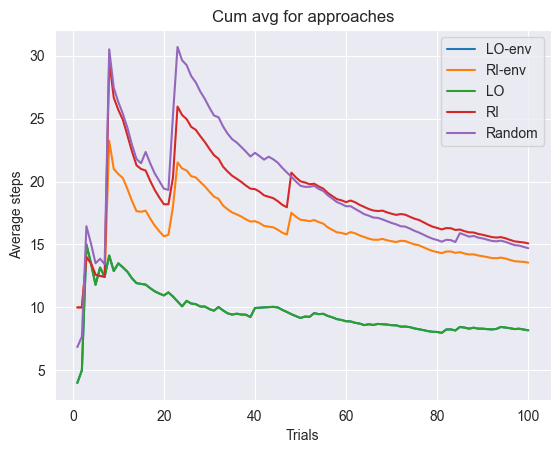

In [9]:
comp_data = {
    "LO-env": (LO_env_steps, "-"),
    "RI-env": (RI_env_steps, "-"),
    "LO": (stepsLO, "-"),
    "RI": ([step if step != np.inf else 150 for step in stepsRI], "-"),
    "Random": ([step if step != np.inf else 150 for step in stepsRand], "-"),
}

draw_cumulative_avg_comparison(comp_data)

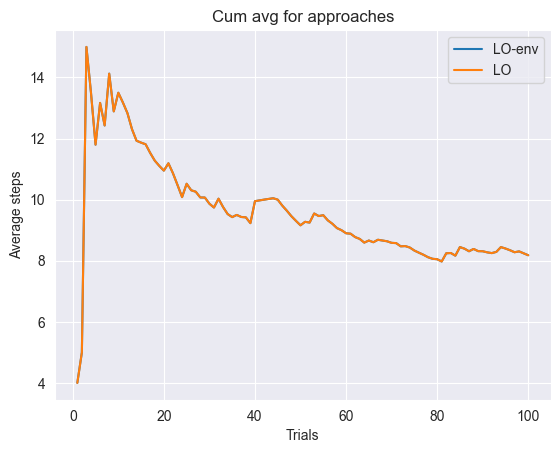

In [10]:
comp_data = {"LO-env": (LO_env_steps, "-"), "LO": (stepsLO, "-")}

draw_cumulative_avg_comparison(comp_data)

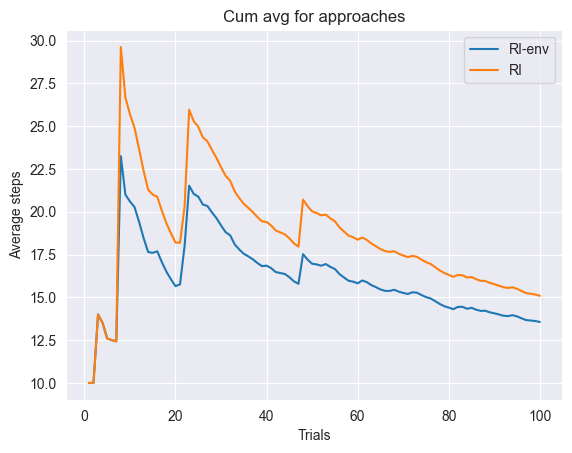

In [11]:
comp_data = {
    "RI-env": (RI_env_steps, "-"),
    "RI": ([step if step != np.inf else 150 for step in stepsRI], "-"),
}

draw_cumulative_avg_comparison(comp_data)